# Importing packages


In [1]:
! pip install nltk
! pip install gensim
! pip install imbalanced-learn

import pandas as pd
import numpy as np

import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from collections import defaultdict  # For word frequency
import spacy  # For preprocessing
warnings.filterwarnings(action = 'ignore')


import random
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, brier_score_loss, roc_auc_score, roc_curve, precision_score, auc, precision_recall_curve, classification_report, average_precision_score, matthews_corrcoef
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import copy

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# import urllib.request
# from urllib.error import HTTPError


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import warnings

from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

warnings.filterwarnings(action = 'ignore')

import random
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.layers import Conv1D, MaxPool1D, Flatten
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2
from numpy import random as rng
from sklearn.utils import shuffle
import pickle
import time

from tensorflow.keras.layers import Input, Lambda, Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Activation, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K

import re
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from keras import optimizers

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
import os
from keras.models import Model,load_model
import json
from keras.models import model_from_json, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
# import keras
from keras.layers import Input, Conv1D, Lambda, Dense, Flatten,MaxPooling1D, Concatenate
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Subtract, Lambda, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Data loading

The associations are based RepoDB database and collected from golden standard database of our prior study, DRP-VEM.

In [ ]:
ass = pd.read_csv("my_repodb.txt")
ass.set_index("Unnamed: 0", inplace=True)
disgenet = pd.read_csv("Gen-Dis-association-Disgenet-2022 - curated_gene_disease_associations.csv")

# making the drug and disease lists
my_disease_list = list(set(ass.ind_id))
my_drug_list = list(set(ass.drug_id))
drugs=list(set(ass.drug_id))
disgenet = disgenet.loc[disgenet['diseaseId'].isin(my_disease_list)]
my_disease_list = list(set(disgenet.diseaseId))
ass = ass.loc[ass['ind_id'].isin(my_disease_list)]
my_drug_list = list(set(ass.drug_id))

# making the list of known drug-disease associations

A=[]
for ix, row in ass.iterrows():
  text = str(row.drug_id)+" has_indicated "+str(row.ind_id)+". "
  A.append(text)

associations = []
for a in A:
  associations.append(a)




In [ ]:
freq = ass.groupby(['drug_id'])['ind_id'].agg('count').reset_index()
freq = freq.sort_values(by='ind_id', ascending=False)


In [ ]:
genid={}
for idx, row in disgenet.iterrows():
  # print(row)
  if row.geneId in genid.keys():
    continue
  else:
    genid[row.geneId]=row.geneSymbol

In [ ]:
has = pd.read_csv("my_repodb.txt") # Positive data: Known Drug-Disease associations
has.set_index("Unnamed: 0", inplace=True)
has = has.drop(['drug_name', 'ind_name','NCT','status', 'phase',
       'DetailedStatus'], axis=1)
has = has.loc[has['ind_id'].isin(my_disease_list)]


hasnt = pd.read_csv("my_only_negatives.txt") # Negative data: Unknown Drug-Disease associations when disease is adverse drug reaction
hasnt.set_index("Unnamed: 0", inplace=True)
hasnt = hasnt.rename(columns={"Not_indicated_for":"ind_id", "Drug_id": "drug_id"})
hasnt = hasnt.loc[hasnt['ind_id'].isin(my_disease_list)]


In [ ]:
# Positive : Known drug-disease associations
print("The number of all known drug disease associations in our dataset: ",(has.shape))
print("Number of unique disease in Pos: ",len(list(set(has.ind_id))) )
print("Number of uniques drugs in Pos: ", len(list(set(has.drug_id))) )

The number of all known drug disease associations in our dataset:  (748, 2)
Number of unique disease in Pos:  141
Number of uniques drugs in Pos:  410


In [ ]:
# Negatives : Unknown drug-disease associations provided the disease is adverse drug reactoins

print("The number of unknown drug disease associations in our dataset: ",(hasnt.shape))
print("Number of unique disease in Neg: ",len(list(set(hasnt.ind_id))) )
print("Number of uniques drugs in Neg: ", len(list(set(hasnt.drug_id))) )

The number of unknown drug disease associations in our dataset:  (1966, 2)
Number of unique disease in Neg:  88
Number of uniques drugs in Neg:  361


The information of diseases are collected using [DisGeNet](https://www.disgenet.org)

In [ ]:


# making the relation of diseases: has_geneid, has_class, has_semantic, has_type

C=[]
num1=0
num2=0
num3=0
num4=0
for idx, row in disgenet.iterrows():
  # if row.diseaseId in my_disease_list:
      semtype = "_".join(row.diseaseSemanticType.split())
      clas = row.diseaseClass.split(";")
      text1 =str(row.diseaseId)+" has_geneid "+str(row.geneSymbol)+". "
      num1+=1
      text2 =str(row.diseaseId)+" has_type "+str(row.diseaseType)+". "
      num2+=1
      text3 =str(row.diseaseId)+" has_semantic "+str(semtype)+". "
      num3+=1
      C.append(text1)
      C.append(text2)
      C.append(text3)
      num4+=len(clas)
      for cl in clas:
        text =str(row.diseaseId)+" has_class "+str(cl)+". "
        C.append(text)

Disease=""
for c in C:
  Disease= Disease+c


In [ ]:
gensymbol = set(list(disgenet.geneSymbol))

making the drug relations: has_sideeffect, has_target, has_domain, has_atccode, has_chemicalstructure

In [ ]:
# has_target relation. data is collected using DrugBank
T=[]
target= pd.read_csv("my_target.txt")
target.set_index("Unnamed: 0", inplace=True)
# target_name = target.columns
for idx, row in target.iterrows():
  for c in target.columns:
    if row[c] ==1 :
      text =str(idx)+" has_target "+str(c)+". "
      T.append(text)
target1=""
for c in T:
  target1= target1+c

In [ ]:
g = pd.DataFrame(target.columns, columns=["target name"])

In [ ]:
PPI = pd.read_csv("PPI-extracted scores more than 80-cleaned.txt")
p=[]
for idx, row in PPI.iterrows():
  if row.P1 in target.columns and row.P2 in target.columns:
    text = str(row.P1)+' has_ppi_interaction '+ str(row.P2)+'. '
    p.append(text)
    # text = str(row.P2)+' has_ppi_interaction '+ str(row.P1)+'. '
    # p.append(text)
ppi=""
for c in p:
  ppi= ppi+c

In [ ]:
GRN = pd.read_csv("GRN-extracted scores more than 90-cleaned.txt")
G=[]
for idx, row in GRN.iterrows():
  if row.G1 in gensymbol and row.G2 in gensymbol:
    text = str(row.G1)+' has_GRN_interaction '+ str(row.G2)+'. '
    G.append(text)
    # text = str(row.G2)+' has_GRN_interaction '+ str(row.G1)+'. '
    # G.append(text)
grn=""
for c in G:
  grn= grn+c

In [ ]:
# has_domain relation. data is collected using UniProt
D=[]
dom= pd.read_csv("my_domain.txt")
dom.set_index("Unnamed: 0", inplace=True)
for idx, row in dom.iterrows():
  for c in dom.columns:
    if row[c] ==1 :
      text =str(idx)+" has_domain "+str(c)+". "
      D.append(text)

domain=""
for c in D:
  domain= domain+c


In [ ]:
# has_chemical relation. data is collected using Pubchem
C=[]
finger= pd.read_csv("my_finger.txt")
finger.set_index("Unnamed: 0", inplace=True)
for idx, row in finger.iterrows():
  for c in finger.columns:
    if row[c] ==1 :
      text =str(idx)+" has_chemical S"+str(c)+". "
      C.append(text)
chemical=""
for c in C:
  chemical= chemical+c

In [ ]:
# has_atc_code relation. data is collected using Sider4.1

ATC=[]
atc= pd.read_csv("my_ATC.txt")
atc.set_index("Unnamed: 0", inplace=True)
for idx, row in atc.iterrows():
  for c in atc.columns:
    if row[c] == 1 and (len(c)==4 or len(c)==1 or len(c)==3 or len(c)==5): # we consider first 4 level of ATC code
      text =str(idx)+" has_atc_code "+str(c)+". "
      ATC.append(text)
atccode=""
for c in ATC:
  atccode= atccode+c

In [ ]:
# has_sideeffect relation. Date is collected using Sider4.1
S=[]
side= pd.read_csv("my_sideeffect.txt")
side.set_index("Unnamed: 0", inplace=True)
for idx, row in side.iterrows():
  for c in side.columns:
    if row[c] ==1 :
      text =str(idx)+" has_sideeffect "+str(c)+". "
      S.append(text)

In [ ]:
# target-domain relation. Date is collected using target_domain_association
TD=[]
td= pd.read_csv("target_domain_association.txt")
td
td.set_index("Unnamed: 0", inplace=True)
td
for idx, row in td.iterrows():
  if idx in target.columns:
    for c in td.columns:
      if row[c] ==1 and c in dom.columns:
        text =str(idx)+" has_tardom "+str(c)+". "
        TD.append(text)

tardom=""
for c in TD:
  tardom= tardom+c

In [ ]:
# target-gene relation. Date is collected using DisGenet
TG=[]
tg= pd.read_csv("Uniprot-2-GeneID.csv")
tg

for idx, row in tg.iterrows():
  if row.UniProtKB in target.columns:
    if row.GENEID in genid.keys():
      text =str(row.UniProtKB)+" has_targen "+str(row.GENEID)+". "
      TG.append(text)

targene=""
for c in TG:
  targene= targene+c

Extracting drug-disease associations

Positive data: Known drug-disease associations

Negative data: a subset of unknown drug-disease associations that disease is an adverse drug reaction and common with our side effects

More over I did it 10 times for getting the results of 10-fold cross validation based on positive data

In [ ]:
A_test=[]
i=0
# randomly chose 10% (78) of positive data for test set
# then extract those pairs from the documnet of associations that word2vec learns
while(i!=74):
  a1 = (random.sample(A, 1))
  a = a1[0].split(" ")
  a2=a[2].split(".")
  A_test.append(a1[0])
  A.remove(a1[0]) # removing the drug-disease pairs that we aim to check their associations by the model
  i+=1

ass="" # making the new associations for training the models
for c in A:
  ass= ass+c

In [ ]:

I=[]
for idx, row in has.iterrows():
  text=str(row.drug_id)+" has_indicated "+str(row.ind_id)+". "
  if text in A_test: # Extracting test associations from positive data
    I.append(idx)
has = has.drop(index=I, axis=0)
print("The number of  known drug disease associations without positive test set:",has.shape)

The number of  known drug disease associations without positive test set: (674, 2)


In [ ]:
# hasnt = hasnt.rename(columns={"Not_indicated_for":"ind_id", "Drug_id": "drug_id"})

print("The number of unknown drug disease associations in our dataset: ",(hasnt.shape))

I=[]
u=0
hasnt_test_idx=random.sample(range(0,hasnt.shape[0]), 78)
for idx, row in hasnt.iterrows():
  if idx in hasnt_test_idx:
    I.append(row)
    x = str(row.drug_id)+" has_sideeffect "+str(row.ind_id)+". "  # we extract those has_sideeffect relations from drug which are in negative test set and we consider them as adverse drug reactions
    if(x in S):
      S.remove(x)
      u = u+1
hasnt = hasnt.drop(index=hasnt_test_idx, axis=0)
print("The number of unknown drug disease associations without negative test set: ",(hasnt.shape))

side=""
for c in S:
  side= side+c
I=pd.DataFrame(I)

The number of unknown drug disease associations in our dataset:  (1966, 2)
The number of unknown drug disease associations without negative test set:  (1888, 2)


#Word2Vec implementation


first, we make the file of our DDKG


In [ ]:

data=[]
sets=[chemical, target1, side, domain, atccode, tardom, targene, grn, ppi, ass, Disease] #Main
# sets=[chemical, target1, side, domain, atccode, tardom, ppi,grn, ass, Disease] #Internal
# sets=[chemical, target1, side, domain, atccode, ass, Disease] #Basic
# sets=[chemical, target1, side, domain, atccode, targene, ass, Disease] #External


for s in sets:
  for i in sent_tokenize(s):
      temp = []
      # tokenize the sentence into words
      for j in word_tokenize(i):
          temp.append(j.lower())
      data.append(temp)

In [ ]:
word_freq = defaultdict(int)
for sent in data:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

12812

we train Word2Vec-CBOW for embedding every entity of DDKG including diseases and drugs

based on trial and error, the best performance of Word2Vec on our dataset is when the length of vectors (size) is 700 and the iteration (iter) is 2000

In [ ]:
model1 = gensim.models.Word2Vec(min_count = 1, alpha=0.001, vector_size = 1024, window = 2, epochs=100, sg=0)
model1.build_vocab(data, progress_per=1000)
model1.train(data, total_examples=model1.corpus_count, epochs=500, report_delay=1)
model1.init_sims(replace=True)

In [3]:
def mean_cal(K):
  sum=0
  for k in K:
    sum= sum+k
  return(sum/len(K))

In [4]:
def model_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Implementation

we consider several approaches:
1. unbalanced dataset
2. Undersampling negative data
3. Upsampling positive data (Random oversample and SMOTE techniqe)
4. Upsampling positive data and undersampling negative data

## Unbalanced

In [ ]:
frames = [has, hasnt]
f = pd.concat(frames)
X=[]
for idx, row in f.iterrows():
  X.append(np.concatenate((model1.wv[(row.drug_id).lower()].reshape((1,1024)), model1.wv[(row.ind_id).lower()].reshape((1,1024))), axis=None))


y=np.zeros((len(X), ))

for i in range(has.shape[0]):
  y[i]=1

# the main test set
X_me = []
Y_me = []
for a in A_test:
  sample = a.split(" ")
  dname =sample[0]
  disname = sample[2].split(".")
  X_me.append(np.concatenate((model1.wv[(dname.rstrip().lower())].reshape((1, 1024)), model1.wv[(disname[0].lstrip().lower())].reshape((1, 1024))), axis=None))
  Y_me.append(1)
for idx, i in I.iterrows():
  if(i.ind_id in my_disease_list and i.drug_id in my_drug_list):
    X_me.append(np.concatenate((model1.wv[i.drug_id.lower()].reshape((1, 1024)), model1.wv[i.ind_id.lower()].reshape((1, 1024))), axis=None))
    Y_me.append(0)


Epoch 1/100
61/61 [==============================] - 4s 11ms/step - loss: 0.6422 - accuracy: 0.7319 - val_loss: 0.5694 - val_accuracy: 0.7441 - lr: 5.0000e-05
Epoch 2/100
61/61 [==============================] - 0s 7ms/step - loss: 0.5513 - accuracy: 0.7345 - val_loss: 0.5055 - val_accuracy: 0.7441 - lr: 5.0000e-05
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: 0.4929 - accuracy: 0.7350 - val_loss: 0.4522 - val_accuracy: 0.7441 - lr: 5.0000e-05
Epoch 4/100
61/61 [==============================] - 1s 8ms/step - loss: 0.4468 - accuracy: 0.7460 - val_loss: 0.4188 - val_accuracy: 0.8034 - lr: 5.0000e-05
Epoch 5/100
61/61 [==============================] - 1s 9ms/step - loss: 0.4115 - accuracy: 0.8037 - val_loss: 0.3920 - val_accuracy: 0.8284 - lr: 5.0000e-05
Epoch 6/100
61/61 [==============================] - 1s 10ms/step - loss: 0.3910 - accuracy: 0.8246 - val_loss: 0.3709 - val_accuracy: 0.8456 - lr: 5.0000e-05
Epoch 7/100
61/61 [==============================]

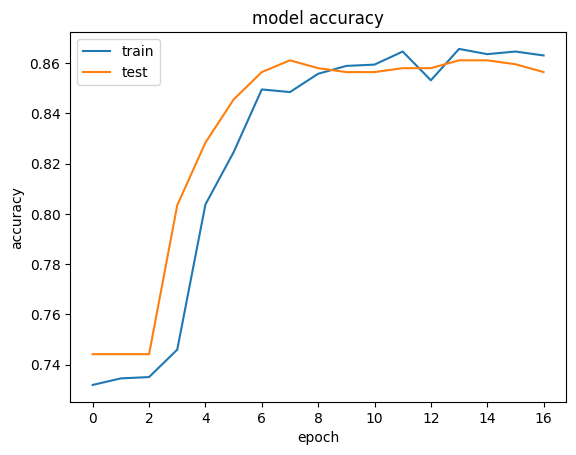

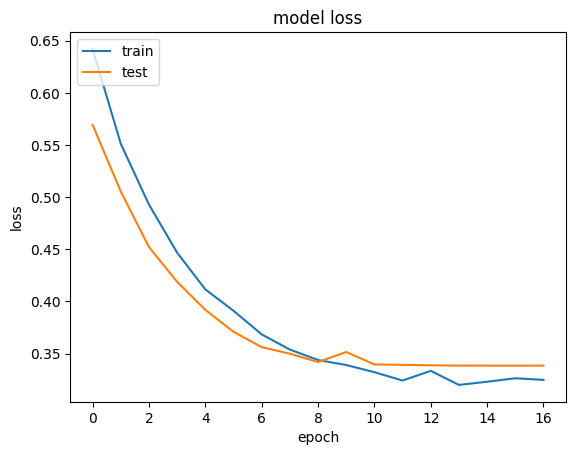

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True)

input_shape1 = (1024,)
input_shape2 = (1024,)

# Define the inputs for the two branches of the network
input1 = Input(shape=input_shape1)
input2 = Input(shape=input_shape2)

# Define the layers for the first branch of the network
x1 = Dense(512, activation='relu')(input1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = x1
modeldrug = Model(input1, output1)
modeldrug.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Define the layers for the second branch of the network
x2 = Dense(512, activation='relu')(input2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = x2
modeldisease = Model(input2, output2)
modeldisease.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Subtract the embeddings from the two branches
diff = Subtract()([output1, output2])
diff = Lambda(lambda d: abs(d))(diff)
# diff = Dropout(0.2)(diff)
concat = Dense(32, activation= 'relu')(diff)
# concat = Dropout(rate=0.2)(concat)


# Define the output layer
output = Dense(1, activation='sigmoid')(concat)

# Define the model
simmodel = Model(inputs=[input1, input2], outputs=output)

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.00005)
simmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define the class weights
class_weights = {0: 1, 1: 1966/748 } # inverse frequency weighting


# Train the model on your data with the defined callbacks

X_me = np.array(X_me)
Y_me = np.array(Y_me)
X = np.array(X)
y = np.array(y)
l_v = np.array(X_me[:, :1024])
r_v = np.array(X_me[:, 1024:])

x_train, x_val, y_train, y_val = train_test_split(X, y)

l = np.array(x_train[:, :1024])
r = np.array(x_train[:, 1024:])


l_val = np.array(x_val[:, :1024])
r_val = np.array(x_val[:, 1024:])

history = simmodel.fit([l, r], y_train, batch_size=32, epochs=100,validation_data=([l_val, r_val], y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# history = simmodel.fit([l, r], y_train, batch_size= 32, epochs= 300, class_weight=class_weights, validation_data=([l_val, r_val],y_val)
                  # ,callbacks=[callback]
                  # )
model_history(history)



In [ ]:
print(simmodel.evaluate([l_v, r_v], Y_me))
y_hat= simmodel.predict([l_v, r_v])
A = roc_auc_score(Y_me, y_hat)
print("auc-roc = ", A)

precision, recall, thresholds = precision_recall_curve(Y_me, y_hat)
PR = auc(recall, precision)

print("auc-pr = ", PR)

print("Brier score:", brier_score_loss(Y_me, y_hat))

y_hat_e = []
for item in y_hat:
  if item >= 0.5:
    y_hat_e.append(1)
  else:
    y_hat_e.append(0)
print("Cohen Kapp score:", cohen_kappa_score(Y_me, y_hat_e))
print("MCC score:", matthews_corrcoef(Y_me, y_hat_e))

5/5 [==============================] - 0s 4ms/step - loss: 0.3970 - accuracy: 0.8092
[0.39703965187072754, 0.8092105388641357]
5/5 [==============================] - 0s 3ms/step
auc-roc =  0.9275814275814276
auc-pr =  0.8843650898200224
Brier score: 0.12406749602315094
Cohen Kapp score: 0.6158940397350994
MCC score: 0.632126727471794


##  Undersample

In [ ]:
frames = [has, hasnt]
f = pd.concat(frames)
X=[]
for idx, row in f.iterrows():
  X.append(np.concatenate((model1.wv[(row.drug_id).lower()].reshape((1,1024)), model1.wv[(row.ind_id).lower()].reshape((1,1024))), axis=None))


y=np.zeros((len(X), ))

for i in range(has.shape[0]):
  y[i]=1

# the main test set
X_me = []
Y_me = []
for a in A_test:
  sample = a.split(" ")
  dname =sample[0]
  disname = sample[2].split(".")
  X_me.append(np.concatenate((model1.wv[(dname.rstrip().lower())].reshape((1, 1024)), model1.wv[(disname[0].lstrip().lower())].reshape((1, 1024))), axis=None))
  Y_me.append(1)
for idx, i in I.iterrows():
  if(i.ind_id in my_disease_list and i.drug_id in my_drug_list):
    X_me.append(np.concatenate((model1.wv[i.drug_id.lower()].reshape((1, 1024)), model1.wv[i.ind_id.lower()].reshape((1, 1024))), axis=None))
    Y_me.append(0)


under = RandomUnderSampler()
X,y = under.fit_resample(X,y)
print(len(X))

1348


Epoch 1/100
32/32 [==============================] - 4s 18ms/step - loss: 0.6904 - accuracy: 0.6053 - val_loss: 0.6841 - val_accuracy: 0.7507 - lr: 5.0000e-05
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6805 - accuracy: 0.7250 - val_loss: 0.6678 - val_accuracy: 0.7478 - lr: 5.0000e-05
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6599 - accuracy: 0.7735 - val_loss: 0.6389 - val_accuracy: 0.7626 - lr: 5.0000e-05
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6259 - accuracy: 0.7804 - val_loss: 0.5970 - val_accuracy: 0.8042 - lr: 5.0000e-05
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 0.5773 - accuracy: 0.7943 - val_loss: 0.5464 - val_accuracy: 0.8131 - lr: 5.0000e-05
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.5273 - accuracy: 0.7903 - val_loss: 0.4884 - val_accuracy: 0.8190 - lr: 5.0000e-05
Epoch 7/100
32/32 [============================

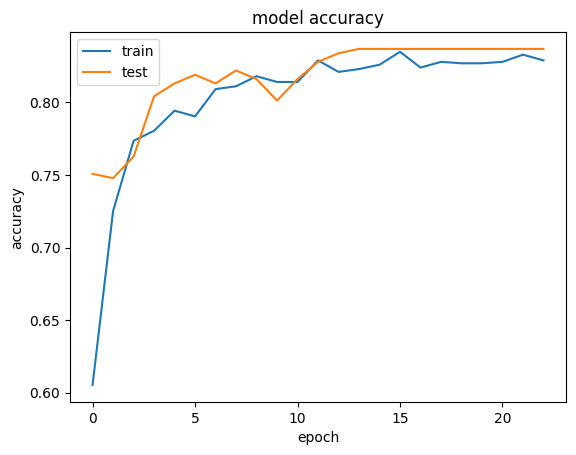

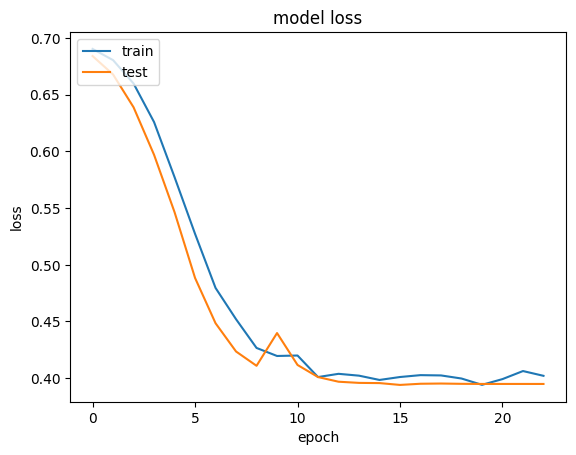

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True)

input_shape1 = (1024,)
input_shape2 = (1024,)

# Define the inputs for the two branches of the network
input1 = Input(shape=input_shape1)
input2 = Input(shape=input_shape2)

# Define the layers for the first branch of the network
x1 = Dense(512, activation='relu')(input1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = x1
modeldrug = Model(input1, output1)
modeldrug.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Define the layers for the second branch of the network
x2 = Dense(512, activation='relu')(input2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = x2
modeldisease = Model(input2, output2)
modeldisease.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Subtract the embeddings from the two branches
diff = Subtract()([output1, output2])
diff = Lambda(lambda d: abs(d))(diff)
# diff = Dropout(0.2)(diff)
concat = Dense(32, activation= 'relu')(diff)
# concat = Dropout(rate=0.2)(concat)


# Define the output layer
output = Dense(1, activation='sigmoid')(concat)

# Define the model
simmodel = Model(inputs=[input1, input2], outputs=output)

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.00005)
simmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define the class weights
class_weights = {0: 1, 1: 1966/748 } # inverse frequency weighting


# Train the model on your data with the defined callbacks

X_me = np.array(X_me)
Y_me = np.array(Y_me)
X = np.array(X)
y = np.array(y)
l_v = np.array(X_me[:, :1024])
r_v = np.array(X_me[:, 1024:])

x_train, x_val, y_train, y_val = train_test_split(X, y)

l = np.array(x_train[:, :1024])
r = np.array(x_train[:, 1024:])


l_val = np.array(x_val[:, :1024])
r_val = np.array(x_val[:, 1024:])

history = simmodel.fit([l, r], y_train, batch_size=32, epochs=100,validation_data=([l_val, r_val], y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# history = simmodel.fit([l, r], y_train, batch_size= 32, epochs= 300, class_weight=class_weights, validation_data=([l_val, r_val],y_val)
                  # ,callbacks=[callback]
                  # )
model_history(history)



In [ ]:
print(simmodel.evaluate([l_v, r_v], Y_me))
y_hat= simmodel.predict([l_v, r_v])
A = roc_auc_score(Y_me, y_hat)
print("auc-roc = ", A)

precision, recall, thresholds = precision_recall_curve(Y_me, y_hat)
PR = auc(recall, precision)

print("auc-pr = ", PR)

print("Brier score:", brier_score_loss(Y_me, y_hat))

y_hat_e = []
for item in y_hat:
  if item >= 0.5:
    y_hat_e.append(1)
  else:
    y_hat_e.append(0)
print("Cohen Kapp score:", cohen_kappa_score(Y_me, y_hat_e))
print("MCC score:", matthews_corrcoef(Y_me, y_hat_e))

5/5 [==============================] - 0s 5ms/step - loss: 0.3405 - accuracy: 0.8618
[0.3404821455478668, 0.8618420958518982]
5/5 [==============================] - 0s 3ms/step
auc-roc =  0.9331254331254331
auc-pr =  0.9256623743767484
Brier score: 0.10376330152805462
Cohen Kapp score: 0.7243523316062177
MCC score: 0.7294603209022543


##  Oversample Using Random method

In [ ]:
frames = [has, hasnt]
f = pd.concat(frames)
X=[]
for idx, row in f.iterrows():
  X.append(np.concatenate((model1.wv[(row.drug_id).lower()].reshape((1,1024)), model1.wv[(row.ind_id).lower()].reshape((1,1024))), axis=None))


y=np.zeros((len(X), ))

for i in range(has.shape[0]):
  y[i]=1

# the main test set
X_me = []
Y_me = []
for a in A_test:
  sample = a.split(" ")
  dname =sample[0]
  disname = sample[2].split(".")
  X_me.append(np.concatenate((model1.wv[(dname.rstrip().lower())].reshape((1, 1024)), model1.wv[(disname[0].lstrip().lower())].reshape((1, 1024))), axis=None))
  Y_me.append(1)
for idx, i in I.iterrows():
  if(i.ind_id in my_disease_list and i.drug_id in my_drug_list):
    X_me.append(np.concatenate((model1.wv[i.drug_id.lower()].reshape((1, 1024)), model1.wv[i.ind_id.lower()].reshape((1, 1024))), axis=None))
    Y_me.append(0)

over = RandomOverSampler(sampling_strategy=0.9)
X, y = over.fit_resample(X,y)
print(len(X))

3587


Epoch 1/100
85/85 [==============================] - 4s 10ms/step - loss: 0.6808 - accuracy: 0.6175 - val_loss: 0.6472 - val_accuracy: 0.7726 - lr: 5.0000e-05
Epoch 2/100
85/85 [==============================] - 1s 8ms/step - loss: 0.6043 - accuracy: 0.7677 - val_loss: 0.5132 - val_accuracy: 0.8194 - lr: 5.0000e-05
Epoch 3/100
85/85 [==============================] - 1s 8ms/step - loss: 0.4871 - accuracy: 0.7933 - val_loss: 0.4243 - val_accuracy: 0.8227 - lr: 5.0000e-05
Epoch 4/100
85/85 [==============================] - 1s 9ms/step - loss: 0.4333 - accuracy: 0.8086 - val_loss: 0.4000 - val_accuracy: 0.8328 - lr: 5.0000e-05
Epoch 5/100
85/85 [==============================] - 1s 10ms/step - loss: 0.4213 - accuracy: 0.8112 - val_loss: 0.3973 - val_accuracy: 0.8272 - lr: 5.0000e-05
Epoch 6/100
85/85 [==============================] - 1s 11ms/step - loss: 0.4050 - accuracy: 0.8197 - val_loss: 0.3824 - val_accuracy: 0.8372 - lr: 5.0000e-05
Epoch 7/100
85/85 [==============================

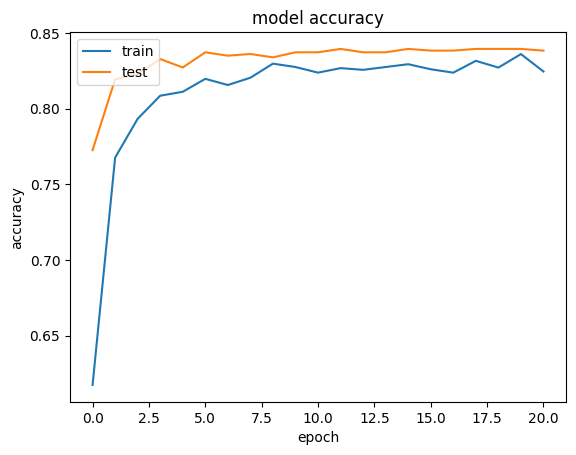

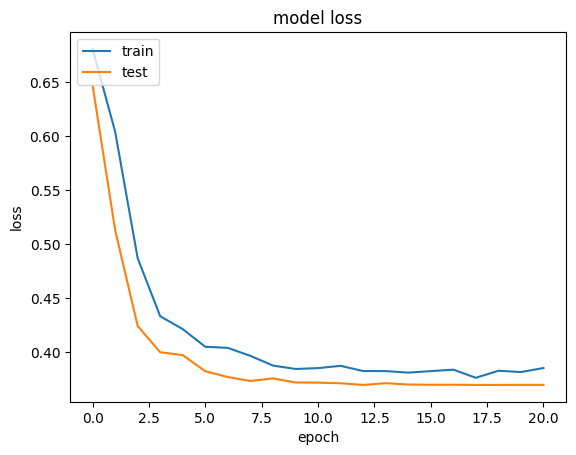

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True)

input_shape1 = (1024,)
input_shape2 = (1024,)

# Define the inputs for the two branches of the network
input1 = Input(shape=input_shape1)
input2 = Input(shape=input_shape2)

# Define the layers for the first branch of the network
x1 = Dense(512, activation='relu')(input1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = x1
modeldrug = Model(input1, output1)
modeldrug.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Define the layers for the second branch of the network
x2 = Dense(512, activation='relu')(input2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = x2
modeldisease = Model(input2, output2)
modeldisease.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Subtract the embeddings from the two branches
diff = Subtract()([output1, output2])
diff = Lambda(lambda d: abs(d))(diff)
# diff = Dropout(0.2)(diff)
concat = Dense(32, activation= 'relu')(diff)
# concat = Dropout(rate=0.2)(concat)


# Define the output layer
output = Dense(1, activation='sigmoid')(concat)

# Define the model
simmodel = Model(inputs=[input1, input2], outputs=output)

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.00005)
simmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define the class weights
class_weights = {0: 1, 1: 1966/748 } # inverse frequency weighting


# Train the model on your data with the defined callbacks

X_me = np.array(X_me)
Y_me = np.array(Y_me)
X = np.array(X)
y = np.array(y)
l_v = np.array(X_me[:, :1024])
r_v = np.array(X_me[:, 1024:])

x_train, x_val, y_train, y_val = train_test_split(X, y)

l = np.array(x_train[:, :1024])
r = np.array(x_train[:, 1024:])


l_val = np.array(x_val[:, :1024])
r_val = np.array(x_val[:, 1024:])

history = simmodel.fit([l, r], y_train, batch_size=32, epochs=100,validation_data=([l_val, r_val], y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# history = simmodel.fit([l, r], y_train, batch_size= 32, epochs= 300, class_weight=class_weights, validation_data=([l_val, r_val],y_val)
                  # ,callbacks=[callback]
                  # )
model_history(history)



In [ ]:
print(simmodel.evaluate([l_v, r_v], Y_me))
y_hat= simmodel.predict([l_v, r_v])
A = roc_auc_score(Y_me, y_hat)
print("auc-roc = ", A)

precision, recall, thresholds = precision_recall_curve(Y_me, y_hat)
PR = auc(recall, precision)

print("auc-pr = ", PR)

print("Brier score:", brier_score_loss(Y_me, y_hat))

y_hat_e = []
for item in y_hat:
  if item >= 0.5:
    y_hat_e.append(1)
  else:
    y_hat_e.append(0)
print("Cohen Kapp score:", cohen_kappa_score(Y_me, y_hat_e))
print("MCC score:", matthews_corrcoef(Y_me, y_hat_e))

5/5 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.8684
[0.32012248039245605, 0.8684210777282715]
5/5 [==============================] - 0s 3ms/step
auc-roc =  0.9381496881496882
auc-pr =  0.9182412407713727
Brier score: 0.09602379660929158
Cohen Kapp score: 0.7370242214532872
MCC score: 0.738045738045738


##  oversample using SMOTE

In [ ]:
frames = [has, hasnt]
f = pd.concat(frames)
X=[]
for idx, row in f.iterrows():
  X.append(np.concatenate((model1.wv[(row.drug_id).lower()].reshape((1,1024)), model1.wv[(row.ind_id).lower()].reshape((1,1024))), axis=None))


y=np.zeros((len(X), ))

for i in range(has.shape[0]):
  y[i]=1

# the main test set
X_me = []
Y_me = []
for a in A_test:
  sample = a.split(" ")
  dname =sample[0]
  disname = sample[2].split(".")
  X_me.append(np.concatenate((model1.wv[(dname.rstrip().lower())].reshape((1, 1024)), model1.wv[(disname[0].lstrip().lower())].reshape((1, 1024))), axis=None))
  Y_me.append(1)
for idx, i in I.iterrows():
  if(i.ind_id in my_disease_list and i.drug_id in my_drug_list):
    X_me.append(np.concatenate((model1.wv[i.drug_id.lower()].reshape((1, 1024)), model1.wv[i.ind_id.lower()].reshape((1, 1024))), axis=None))
    Y_me.append(0)


over = SMOTE(sampling_strategy=0.9)
# over = RandomOverSampler(0.9)
X, y = over.fit_resample(X,y)
print(len(X))

3587


Epoch 1/100
85/85 [==============================] - 5s 11ms/step - loss: 0.6798 - accuracy: 0.7019 - val_loss: 0.6410 - val_accuracy: 0.8049 - lr: 5.0000e-05
Epoch 2/100
85/85 [==============================] - 1s 9ms/step - loss: 0.6006 - accuracy: 0.7944 - val_loss: 0.5084 - val_accuracy: 0.8239 - lr: 5.0000e-05
Epoch 3/100
85/85 [==============================] - 1s 8ms/step - loss: 0.4871 - accuracy: 0.8011 - val_loss: 0.4238 - val_accuracy: 0.8239 - lr: 5.0000e-05
Epoch 4/100
85/85 [==============================] - 1s 8ms/step - loss: 0.4318 - accuracy: 0.8141 - val_loss: 0.3872 - val_accuracy: 0.8339 - lr: 5.0000e-05
Epoch 5/100
85/85 [==============================] - 1s 8ms/step - loss: 0.4163 - accuracy: 0.8130 - val_loss: 0.3862 - val_accuracy: 0.8384 - lr: 5.0000e-05
Epoch 6/100
85/85 [==============================] - 1s 9ms/step - loss: 0.4046 - accuracy: 0.8190 - val_loss: 0.3673 - val_accuracy: 0.8439 - lr: 5.0000e-05
Epoch 7/100
85/85 [==============================] 

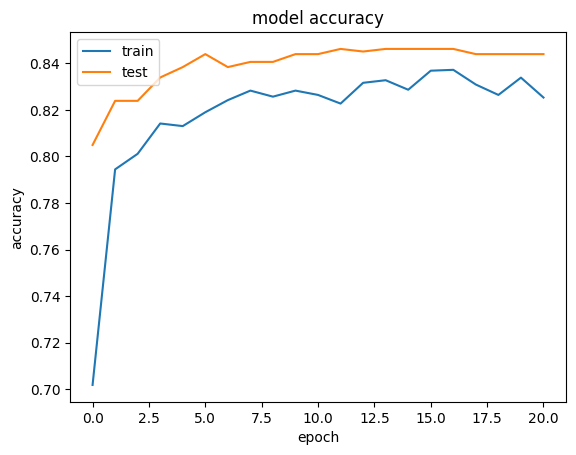

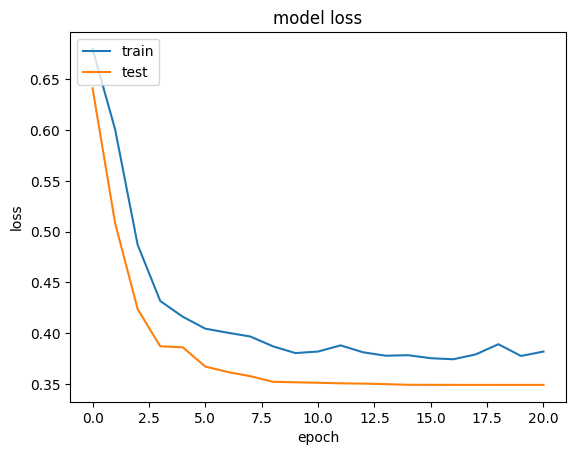

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True)

input_shape1 = (1024,)
input_shape2 = (1024,)

# Define the inputs for the two branches of the network
input1 = Input(shape=input_shape1)
input2 = Input(shape=input_shape2)

# Define the layers for the first branch of the network
x1 = Dense(512, activation='relu')(input1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = x1
modeldrug = Model(input1, output1)
modeldrug.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Define the layers for the second branch of the network
x2 = Dense(512, activation='relu')(input2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = x2
modeldisease = Model(input2, output2)
modeldisease.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Subtract the embeddings from the two branches
diff = Subtract()([output1, output2])
diff = Lambda(lambda d: abs(d))(diff)
# diff = Dropout(0.2)(diff)
concat = Dense(32, activation= 'relu')(diff)
# concat = Dropout(rate=0.2)(concat)


# Define the output layer
output = Dense(1, activation='sigmoid')(concat)

# Define the model
simmodel = Model(inputs=[input1, input2], outputs=output)

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.00005)
simmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define the class weights
class_weights = {0: 1, 1: 1966/748 } # inverse frequency weighting


# Train the model on your data with the defined callbacks

X_me = np.array(X_me)
Y_me = np.array(Y_me)
X = np.array(X)
y = np.array(y)
l_v = np.array(X_me[:, :1024])
r_v = np.array(X_me[:, 1024:])

x_train, x_val, y_train, y_val = train_test_split(X, y)

l = np.array(x_train[:, :1024])
r = np.array(x_train[:, 1024:])


l_val = np.array(x_val[:, :1024])
r_val = np.array(x_val[:, 1024:])

history = simmodel.fit([l, r], y_train, batch_size=32, epochs=100,validation_data=([l_val, r_val], y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# history = simmodel.fit([l, r], y_train, batch_size= 32, epochs= 300, class_weight=class_weights, validation_data=([l_val, r_val],y_val)
                  # ,callbacks=[callback]
                  # )
model_history(history)



In [ ]:
print(simmodel.evaluate([l_v, r_v], Y_me))
y_hat= simmodel.predict([l_v, r_v])
A = roc_auc_score(Y_me, y_hat)
print("auc-roc = ", A)

precision, recall, thresholds = precision_recall_curve(Y_me, y_hat)
PR = auc(recall, precision)

print("auc-pr = ", PR)

print("Brier score:", brier_score_loss(Y_me, y_hat))

y_hat_e = []
for item in y_hat:
  if item >= 0.5:
    y_hat_e.append(1)
  else:
    y_hat_e.append(0)
print("Cohen Kapp score:", cohen_kappa_score(Y_me, y_hat_e))
print("MCC score:", matthews_corrcoef(Y_me, y_hat_e))

5/5 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.8684
[0.3236018121242523, 0.8684210777282715]
5/5 [==============================] - 0s 3ms/step
auc-roc =  0.9372834372834373
auc-pr =  0.9249771050165928
Brier score: 0.09754309566486338
Cohen Kapp score: 0.7370242214532872
MCC score: 0.738045738045738


## First oversample, Next Undersample

In [ ]:

frames = [has, hasnt]

f = pd.concat(frames)
X=[]
for idx, row in f.iterrows():
  X.append(np.concatenate((model1.wv[(row.drug_id).lower()].reshape((1,1024)), model1.wv[(row.ind_id).lower()].reshape((1,1024))), axis=None))

y=np.zeros((len(X), ))

for i in range(has.shape[0]):
  y[i]=1

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(sampling_strategy=0.9)
# over = RandomOverSampler(0.9)
under = RandomUnderSampler()
X, y = over.fit_resample(X,y)
print(len(X))
X,y = under.fit_resample(X,y)
print(len(X))


# the main test set
X_me = []
Y_me = []
for a in A_test:
  sample = a.split(" ")
  dname =sample[0]
  disname = sample[2].split(".")
  X_me.append(np.concatenate((model1.wv[(dname.rstrip().lower())].reshape((1, 1024)), model1.wv[(disname[0].lstrip().lower())].reshape((1, 1024))), axis=None))
  Y_me.append(1)
for idx, i in I.iterrows():
  if(i.ind_id in my_disease_list and i.drug_id in my_drug_list):
    X_me.append(np.concatenate((model1.wv[i.drug_id.lower()].reshape((1, 1024)), model1.wv[i.ind_id.lower()].reshape((1, 1024))), axis=None))
    Y_me.append(0)

3587
3398


Epoch 1/100
80/80 [==============================] - 6s 11ms/step - loss: 0.6833 - accuracy: 0.5581 - val_loss: 0.6583 - val_accuracy: 0.7141 - lr: 5.0000e-05
Epoch 2/100
80/80 [==============================] - 1s 8ms/step - loss: 0.6200 - accuracy: 0.7567 - val_loss: 0.5539 - val_accuracy: 0.8035 - lr: 5.0000e-05
Epoch 3/100
80/80 [==============================] - 1s 8ms/step - loss: 0.5086 - accuracy: 0.8077 - val_loss: 0.4407 - val_accuracy: 0.8212 - lr: 5.0000e-05
Epoch 4/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4327 - accuracy: 0.8171 - val_loss: 0.3961 - val_accuracy: 0.8212 - lr: 5.0000e-05
Epoch 5/100
80/80 [==============================] - 1s 8ms/step - loss: 0.4058 - accuracy: 0.8277 - val_loss: 0.3766 - val_accuracy: 0.8400 - lr: 5.0000e-05
Epoch 6/100
80/80 [==============================] - 1s 9ms/step - loss: 0.3828 - accuracy: 0.8312 - val_loss: 0.3700 - val_accuracy: 0.8447 - lr: 5.0000e-05
Epoch 7/100
80/80 [==============================] 

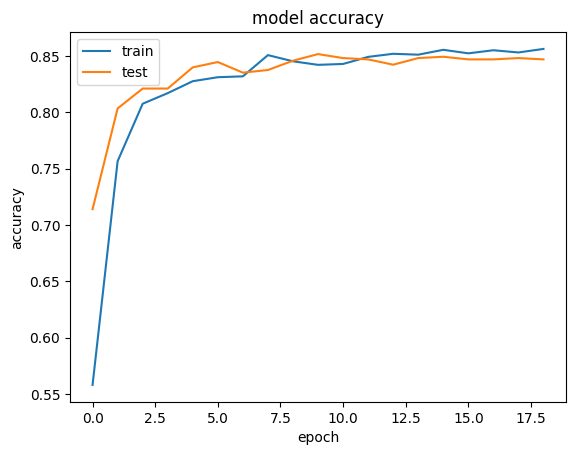

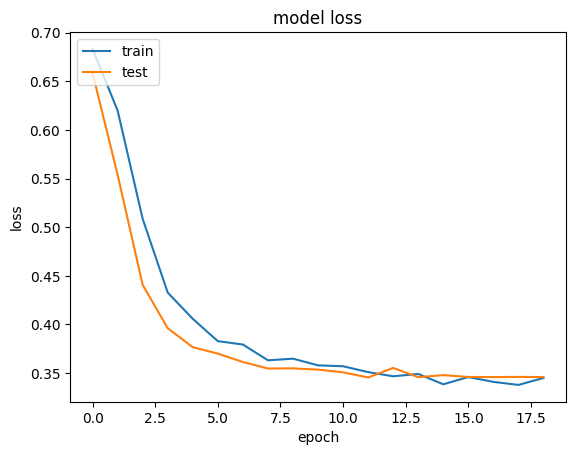

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True)

input_shape1 = (1024,)
input_shape2 = (1024,)

# Define the inputs for the two branches of the network
input1 = Input(shape=input_shape1)
input2 = Input(shape=input_shape2)

# Define the layers for the first branch of the network
x1 = Dense(512, activation='relu')(input1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = x1
modeldrug = Model(input1, output1)
modeldrug.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Define the layers for the second branch of the network
x2 = Dense(512, activation='relu')(input2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = x2
modeldisease = Model(input2, output2)
modeldisease.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Subtract the embeddings from the two branches
diff = Subtract()([output1, output2])
diff = Lambda(lambda d: abs(d))(diff)
# diff = Dropout(0.2)(diff)
# Concatenate the absolute difference with the embeddings
# concat = concatenate([output1, output2])
concat = Dense(32, activation= 'relu')(diff)
# concat = Dropout(rate=0.2)(concat)


# Define the output layer
output = Dense(1, activation='sigmoid')(concat)

# Define the model
simmodel = Model(inputs=[input1, input2], outputs=output)

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.00005)
simmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define the class weights
class_weights = {0: 1, 1: 1966/748 } # inverse frequency weighting


# Train the model on your data with the defined callbacks

X_me = np.array(X_me)
Y_me = np.array(Y_me)
X = np.array(X)
y = np.array(y)
l_v = np.array(X_me[:, :1024])
r_v = np.array(X_me[:, 1024:])

x_train, x_val, y_train, y_val = train_test_split(X, y)

l = np.array(x_train[:, :1024])
r = np.array(x_train[:, 1024:])


l_val = np.array(x_val[:, :1024])
r_val = np.array(x_val[:, 1024:])

history = simmodel.fit([l, r], y_train, batch_size=32, epochs=100,validation_data=([l_val, r_val], y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# history = simmodel.fit([l, r], y_train, batch_size= 32, epochs= 300, class_weight=class_weights, validation_data=([l_val, r_val],y_val)
                  # ,callbacks=[callback]
                  # )
model_history(history)




In [ ]:
print(simmodel.evaluate([l_v, r_v], Y_me))
y_hat= simmodel.predict([l_v, r_v])
A = roc_auc_score(Y_me, y_hat)
print("auc-roc = ", A)

precision, recall, thresholds = precision_recall_curve(Y_me, y_hat)
PR = auc(recall, precision)

print("auc-pr = ", PR)

print("Brier score:", brier_score_loss(Y_me, y_hat))

y_hat_e = []
for item in y_hat:
  if item >= 0.5:
    y_hat_e.append(1)
  else:
    y_hat_e.append(0)
print("Cohen Kapp score:", cohen_kappa_score(Y_me, y_hat_e))
print("MCC score:", matthews_corrcoef(Y_me, y_hat_e))


# Covid Drugs

## Data

In [5]:
ass = pd.read_csv("my_repodb.txt")
ass.set_index("Unnamed: 0", inplace=True)
disgenet = pd.read_csv("Gen-Dis-association-Disgenet-2022 - curated_gene_disease_associations CORONA VIRUS INFECTION.csv")

# making the drug and disease lists
my_disease_list = list(set(ass.ind_id))
my_disease_list.append("C0206750")
my_drug_list = list(set(ass.drug_id))
drugs=list(set(ass.drug_id))
disgenet = disgenet.loc[disgenet['diseaseId'].isin(my_disease_list)]
my_disease_list = list(set(disgenet.diseaseId))
ass = ass.loc[ass['ind_id'].isin(my_disease_list)]
my_drug_list = list(set(ass.drug_id))


covid_drugs= pd.read_csv("Covid-19 drugs from drugbank.csv")
covid_drugs

,Drug name,drug_id
0,Ritonavir,DB00503
1,Chloroquine,DB00608
2,Darunavir,DB01264
3,Lopinavir,DB01601
4,Galidesivir,DB11676
...,...,...
63,Fostamatinib,DB12010
64,Sotrovimab,DB16355
65,MM3122,DB16737
66,Cilgavimab,DB16393


In [6]:
# Saxagliptin DB06335
# Vildagliptin DB04876
# Linagliptin DB08882
# Sitagliptin DB01261
# Alogliptin DB06203

gliptins=['DB06335', 'DB04876','DB08882','DB01261','DB06203' ]

In [7]:
i=0
my_covid_drug = []
for d in covid_drugs.drug_id:
  if d in my_drug_list:
    my_covid_drug.append(d)
    i+=1
print(i)



7


In [8]:
has = pd.read_csv("my_repodb.txt") # Positive data: Known Drug-Disease associations
has.set_index("Unnamed: 0", inplace=True)
has = has.drop(['drug_name', 'ind_name','NCT','status', 'phase',
       'DetailedStatus'], axis=1)
has = has.loc[has['ind_id'].isin(my_disease_list)]


hasnt = pd.read_csv("my_only_negatives.txt") # Negative data: Unknown Drug-Disease associations when disease is adverse drug reaction
hasnt.set_index("Unnamed: 0", inplace=True)
hasnt = hasnt.rename(columns={"Not_indicated_for":"ind_id", "Drug_id": "drug_id"})
hasnt = hasnt.loc[hasnt['ind_id'].isin(my_disease_list)]


In [9]:


# making the relation of diseases: has_geneid, has_class, has_semantic, has_type

C=[]
num1=0
num2=0
num3=0
num4=0
for idx, row in disgenet.iterrows():
  # if row.diseaseId in my_disease_list:
      semtype = "_".join(row.diseaseSemanticType.split())
      clas = row.diseaseClass.split(";")
      text1 =str(row.diseaseId)+" has_geneid "+str(row.geneSymbol)+". "
      num1+=1
      text2 =str(row.diseaseId)+" has_type "+str(row.diseaseType)+". "
      num2+=1
      text3 =str(row.diseaseId)+" has_semantic "+str(semtype)+". "
      num3+=1
      C.append(text1)
      C.append(text2)
      C.append(text3)
      num4+=len(clas)
      for cl in clas:
        text =str(row.diseaseId)+" has_class "+str(cl)+". "
        C.append(text)

Disease=""
for c in C:
  Disease= Disease+c


making the drug relations: has_sideeffect, has_target, has_domain, has_atccode, has_chemicalstructure

In [10]:
# has_target relation. data is collected using DrugBank
T=[]
target= pd.read_csv("my_target.txt")
target.set_index("Unnamed: 0", inplace=True)
for idx, row in target.iterrows():
  for c in target.columns:
    if row[c] ==1 :
      text =str(idx)+" has_target "+str(c)+". "
      T.append(text)
target1=""
for c in T:
  target1= target1+c

In [11]:
# has_domain relation. data is collected using UniProt
D=[]
dom= pd.read_csv("my_domain.txt")
dom.set_index("Unnamed: 0", inplace=True)
for idx, row in dom.iterrows():
  for c in dom.columns:
    if row[c] ==1 :
      text =str(idx)+" has_domain "+str(c)+". "
      D.append(text)

domain=""
for c in D:
  domain= domain+c


In [12]:
# has_chemical relation. data is collected using Pubchem
C=[]
finger= pd.read_csv("my_finger.txt")
finger.set_index("Unnamed: 0", inplace=True)
for idx, row in finger.iterrows():
  for c in finger.columns:
    if row[c] ==1 :
      text =str(idx)+" has_chemical S"+str(c)+". "
      C.append(text)
chemical=""
for c in C:
  chemical= chemical+c

In [13]:
# has_atc_code relation. data is collected using Sider4.1

ATC=[]
atc= pd.read_csv("my_ATC.txt")
atc.set_index("Unnamed: 0", inplace=True)
for idx, row in atc.iterrows():
  for c in atc.columns:
    if row[c] == 1 and (len(c)==4 or len(c)==1 or len(c)==3 or len(c)==5): # we consider first 4 level of ATC code
      text =str(idx)+" has_atc_code "+str(c)+". "
      ATC.append(text)
atccode=""
for c in ATC:
  atccode= atccode+c

In [14]:
# has_sideeffect relation. Date is collected using Sider4.1
S=[]
side= pd.read_csv("my_sideeffect.txt")
side.set_index("Unnamed: 0", inplace=True)
for idx, row in side.iterrows():
  for c in side.columns:
    if row[c] ==1 :
      text =str(idx)+" has_sideeffect "+str(c)+". "
      S.append(text)

In [15]:
PPI = pd.read_csv("PPI-extracted scores more than 80-cleaned.txt")
p=[]
for idx, row in PPI.iterrows():
  if row.P1 in target.columns and row.P2 in target.columns:
    text = str(row.P1)+' has_ppi_interaction '+ str(row.P2)+'. '
    p.append(text)
ppi=""
for c in p:
  ppi= ppi+c

In [16]:
gensymbol = set(list(disgenet.geneSymbol))
GRN = pd.read_csv("GRN-extracted scores more than 90-cleaned.txt")
G=[]
for idx, row in GRN.iterrows():
  if row.G1 in gensymbol and row.G2 in gensymbol:
    text = str(row.G1)+' has_GRN_interaction '+ str(row.G2)+'. '
    G.append(text)
grn=""
for c in G:
  grn= grn+c

In [17]:
# target-domain relation. Date is collected using target_domain_association
TD=[]
td= pd.read_csv("target_domain_association.txt")
td
td.set_index("Unnamed: 0", inplace=True)
td
for idx, row in td.iterrows():
  if idx in target.columns:
    for c in td.columns:
      if row[c] ==1 and c in dom.columns:
        text =str(idx)+" has_tardom "+str(c)+". "
        TD.append(text)

tardom=""
for c in TD:
  tardom= tardom+c

In [18]:
# target-gene relation. Date is collected using DisGenet
genid={}
for idx, row in disgenet.iterrows():
  # print(row)
  if row.geneId in genid.keys():
    continue
  else:
    genid[row.geneId]=row.geneSymbol
TG=[]
tg= pd.read_csv("Uniprot-2-GeneID.csv")
tg

for idx, row in tg.iterrows():
  if row.UniProtKB in target.columns:
    if row.GENEID in genid.keys():
      text =str(row.UniProtKB)+" has_targen "+str(row.GENEID)+". "
      TG.append(text)

targene=""
for c in TG:
  targene= targene+c

In [19]:
A=[]
for ix, row in ass.iterrows():
  text = str(row.drug_id)+" has_indicated "+str(row.ind_id)+". "
  A.append(text)

ass="" # making the new associations for training the models
for c in A:
  ass= ass+c

side=""
for c in S:
  side= side+c

I = hasnt

## Word2Vec

In [20]:

data=[]
sets=[chemical, target1, side, domain, atccode,ppi, grn, tardom, targene, ass, Disease]

for s in sets:
  for i in sent_tokenize(s):
      temp = []
      # tokenize the sentence into words
      for j in word_tokenize(i):
          temp.append(j.lower())
      data.append(temp)

In [21]:
word_freq = defaultdict(int)
for sent in data:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

12825

In [22]:
model1 = gensim.models.Word2Vec(min_count = 1, alpha=0.001, vector_size = 1024, window = 2, epochs=100, sg=0)
model1.build_vocab(data, progress_per=10000)
model1.train(data, total_examples=model1.corpus_count, epochs=500, report_delay=1)
model1.init_sims(replace=True)

## Test on COVID-19

In [23]:
frames = [has, hasnt]

f = pd.concat(frames)
X=[]
for idx, row in f.iterrows():
  X.append(np.concatenate((model1.wv[(row.drug_id).lower()], model1.wv[(row.ind_id).lower()]), axis=None))
y=np.zeros((len(X), ))

for i in range(has.shape[0]):
  y[i]=1


In [24]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(sampling_strategy=0.9)
# over = RandomOverSampler(0.9)
under = RandomUnderSampler()
X, y = over.fit_resample(X,y)
print(len(X))
X,y = under.fit_resample(X,y)
print(len(X))

3735
3538


Epoch 1/100
83/83 [==============================] - 4s 13ms/step - loss: 0.6741 - accuracy: 0.7158 - val_loss: 0.6281 - val_accuracy: 0.7887 - lr: 5.0000e-05
Epoch 2/100
83/83 [==============================] - 1s 10ms/step - loss: 0.5633 - accuracy: 0.7976 - val_loss: 0.4841 - val_accuracy: 0.8158 - lr: 5.0000e-05
Epoch 3/100
83/83 [==============================] - 1s 10ms/step - loss: 0.4408 - accuracy: 0.8198 - val_loss: 0.4341 - val_accuracy: 0.8249 - lr: 5.0000e-05
Epoch 4/100
83/83 [==============================] - 1s 9ms/step - loss: 0.4015 - accuracy: 0.8277 - val_loss: 0.4161 - val_accuracy: 0.8249 - lr: 5.0000e-05
Epoch 5/100
83/83 [==============================] - 1s 10ms/step - loss: 0.3916 - accuracy: 0.8292 - val_loss: 0.4111 - val_accuracy: 0.8260 - lr: 5.0000e-05
Epoch 6/100
83/83 [==============================] - 1s 6ms/step - loss: 0.3787 - accuracy: 0.8391 - val_loss: 0.4033 - val_accuracy: 0.8203 - lr: 5.0000e-05
Epoch 7/100
83/83 [=============================

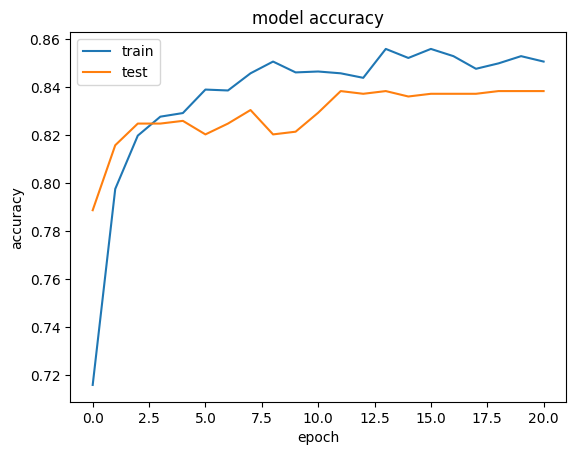

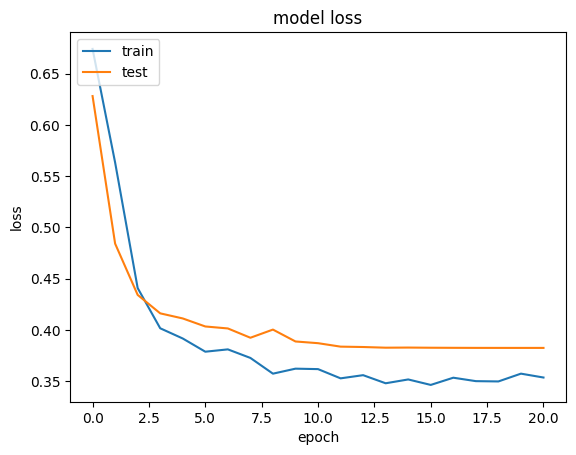

In [30]:


# Define the callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True)

input_shape1 = (1024,)
input_shape2 = (1024,)

# Define the inputs for the two branches of the network
input1 = Input(shape=input_shape1)
input2 = Input(shape=input_shape2)

# Define the layers for the first branch of the network
x1 = Dense(512, activation='relu')(input1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(rate=0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = x1
modeldrug = Model(input1, output1)
modeldrug.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Define the layers for the second branch of the network
x2 = Dense(512, activation='relu')(input2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(rate=0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = x2
modeldisease = Model(input2, output2)
modeldisease.compile(loss='kl-divergence', optimizer=SGD(learning_rate=0.0005), metrics=['accuracy'])
# Subtract the embeddings from the two branches
diff = Subtract()([output1, output2])
diff = Lambda(lambda d: abs(d))(diff)
# diff = Dropout(0.2)(diff)
# Concatenate the absolute difference with the embeddings
# concat = concatenate([output1, output2])
concat = Dense(32, activation= 'relu')(diff)
# concat = Dropout(rate=0.2)(concat)


# Define the output layer
output = Dense(1, activation='sigmoid')(concat)

# Define the model
simmodel = Model(inputs=[input1, input2], outputs=output)

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.00005)
simmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define the class weights
class_weights = {0: 1, 1: 1966/748 } # inverse frequency weighting


# Train the model on your data with the defined callbacks

X = np.array(X)
y = np.array(y)

x_train, x_val, y_train, y_val = train_test_split(X, y)

l = np.array(x_train[:, :1024])
r = np.array(x_train[:, 1024:])


l_val = np.array(x_val[:, :1024])
r_val = np.array(x_val[:, 1024:])

history = simmodel.fit([l, r], y_train, batch_size=32, epochs=100,validation_data=([l_val, r_val], y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# history = simmodel.fit([l, r], y_train, batch_size= 32, epochs= 300, class_weight=class_weights, validation_data=([l_val, r_val],y_val)
                  # ,callbacks=[callback]
                  # )
model_history(history)




Now, we calculate the association score between our disease and all drugs to find the first 10 reltaed drugs to them

In [31]:
covid_disease=['C0206750']
xcovid=[]
SCOR_PD=pd.DataFrame(columns=["Dis_id", "Drug_id", "Score"]) # To save association score
for dis in covid_disease:
  for drug in my_drug_list:
    xcovid.append(np.concatenate((model1.wv[(drug).lower()], model1.wv[(dis).lower()]), axis=None))

xcovid= np.array(xcovid)
lcovid = np.array(xcovid[:, :1024])
rcovid = np.array(xcovid[:, 1024:])
i=0
s = simmodel.predict([lcovid, rcovid])
for dis in covid_disease:
  for drug in my_drug_list:
    df2 = {"Dis_id":dis, "Drug_id":drug, "Score":s[i]}
    i+=1
    SCOR_PD = SCOR_PD.append(df2, ignore_index = True)


13/13 [==============================] - 0s 3ms/step


In [32]:
SCOR_PD = SCOR_PD.sort_values(by='Score', ascending=False)
SCOR_PD

,Dis_id,Drug_id,Score
97,C0206750,DB00240,[0.9820702]
0,C0206750,DB01047,[0.9820264]
116,C0206750,DB00838,[0.98114395]
7,C0206750,DB02703,[0.98110193]
271,C0206750,DB01130,[0.98105294]
...,...,...,...
298,C0206750,DB01175,[0.4518802]
226,C0206750,DB00268,[0.4477359]
19,C0206750,DB00215,[0.43762496]
366,C0206750,DB00230,[0.43102533]


In [33]:
df = SCOR_PD.loc[SCOR_PD["Drug_id"].isin(my_covid_drug)]
df

,Dis_id,Drug_id,Score
151,C0206750,DB01234,[0.97374773]
406,C0206750,DB00959,[0.9699562]
82,C0206750,DB01394,[0.96028805]
205,C0206750,DB00608,[0.955688]
177,C0206750,DB00207,[0.914545]
287,C0206750,DB08868,[0.90901476]
237,C0206750,DB01050,[0.86170983]


In [34]:
df2 = SCOR_PD.loc[SCOR_PD["Drug_id"].isin(gliptins)]
df2

,Dis_id,Drug_id,Score
336,C0206750,DB06203,[0.9642851]
242,C0206750,DB04876,[0.96110183]
148,C0206750,DB06335,[0.95970964]
232,C0206750,DB08882,[0.9376126]
15,C0206750,DB01261,[0.876006]
